# Projeto 1 - Ciência dos dado

Lais Nascimento da Silva | 2B engenharia

**Pergunta**:
Analisando dados de países que são da Organização Internacional do Trabalho, observa-se uma queda maior da taxa de trabalho infantil, depois que entraram nessa organização, compado com países que não participam desse grupo? A queda na taxa de trabalho infantil inflencia as taxas de alfabetização e de qualificação de mão de obra?

**Hipótese**:
A Organização Internacional do Trabalho (OIT), tem como um de seus principais objetivos erradicar o trabalho infantil, dessa maneira, a OIT age com o intuito de atingir esse objetivo, assim a tendência das taxas de trabalho infantil nos países que entram na organização é diminuir. O trabalho infantil na maioria das vezes priva a criança de frenquentar a escola e desse modo, menos crianças se alfabetizam. Portanto, a hipótese analisada será de que quando um país entra na OIT as taxas de trabalho infantil caem de maneira mais intensa e consequentemente as taxas de alfabetização aumentam, pois as crianças poderão frenquentar a escola regurlamente.

link OIT e trabalho infantil: https://www.ilo.org/brasilia/temas/trabalho-infantil/lang--pt/index.htm
https://www.ilo.org/global/docs/WCMS_714085/lang--en/index.htm



**Taxas de trabalho infantil, Taxas de alfabetização**
Os dados foram tirados do site: https://www.gapminder.org/data/

**Análise de dados:**


**Leitura dos dados**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [2]:
import os

os.getcwd()


'C:\\Users\\User\\Desktop\\2ºsemestre\\Ciência dos dados\\Projeto1_Ciencia_dos_Dados'

In [3]:
#Leitura dos arquivos em Excel
trab_inf= pd.read_excel('trab_infantil.xlsx')
alfab = pd.read_excel('alfabetizacao.xlsx')

In [4]:
#Tabela de trabalho infantil nos países em cada ano

trab_inf.head(3)

,country,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.3,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,36.6,NaN,NaN,...,NaN,NaN,NaN,5.5,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN


In [5]:
#tabela de taxa de alfabetização em cada país por ano

alfab.head(3)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,72.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.30,13.70,12.800,9.530,5.63,3.84,4.400,4.340,2.940,NaN
2,Algeria,NaN,NaN,NaN,32.5,28.6,26.2,24.2,22.6,21.6,...,1.03,1.11,0.949,0.889,NaN,NaN,0.733,0.769,0.557,NaN


Como os dados de trabalho infantil estão a partir de 1994, serão analisados os dados desse ano.

Primeiro serão selecionados os Dados de trabalho infantil de 1994

In [6]:
TI_membros_OIT_1994=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Ethiopia', 'Gabon', 'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Portugal', 'Romania', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']
TI_não_membros_1994=['Gambia', 'Kyrgyz Republic', 'Serbia', 'South Africa', 'South Sudan', 'Syria', 'Timor-Leste']

In [7]:
trab_inf_idx = trab_inf.set_index('country')

In [8]:
trab_inf_idx.loc[:,"ORG"] = 0

In [9]:
trab_inf_idx.loc[TI_membros_OIT_1994, "ORG"] =1
TI=trab_inf_idx


In [39]:
trab_inf_idx.loc[trab_inf_idx["ORG"]==1]

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,ORG
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.30,NaN,NaN,NaN,NaN,NaN,1
Albania,NaN,NaN,NaN,NaN,NaN,NaN,36.60,NaN,NaN,NaN,...,NaN,NaN,5.5,NaN,NaN,NaN,NaN,NaN,NaN,1
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.50,NaN,NaN,NaN,1
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.03,NaN,NaN,NaN,NaN,1
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.9,NaN,NaN,NaN,NaN,NaN,NaN,1
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,9.73,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.5,...,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN,1
Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.30,NaN,NaN,NaN,NaN,1


In [10]:
#Tabela de trabalho infantil apenas com os países que estão na OIT no ano de 1994
TI_org_1994= TI.loc[(TI.ORG==1), [1994]]
TI_org_1994.head(3)

,1994
country,
Afghanistan,NaN
Albania,NaN
Algeria,NaN


In [11]:
#Tabela de trabalho infantil apenas com os países que estão na OIT no ano de 1994
TI_fora_1994= TI.loc[(TI.ORG==0), [1994]]
TI_fora_1994.head(3)

,1994
country,
Gambia,NaN
Kyrgyz Republic,NaN
Serbia,NaN


Agora, serão selecionas os dados sobre a Taxa de Alfabetização em 1994

In [12]:
AF_membros_OIT_1994=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Lao', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovenia', 'Solomon Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Tajikistan', 'Tanzania', 'Thailand', 'Togo',  'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']
AF_não_membros_1994=['Bhutan', 'Brunei', 'Cape Verde', 'Gambia', 'Guyana', 'Kiribati', 'Kyrgyz Republic', 'Liechtenstein', 'Maldives', 'Marshall Islands', 'Micronesia, Fed. Sts.', 'Montenegro', 'Nauru', 'North Korea',  'Palau', 'Palestine',  'Samoa', 'South Africa', 'South Korea', 'South Sudan', 'St. Lucia', 'St. Vincent and the Grenadines', 'Syria', 'Timor-Leste', 'Tonga', 'Tuvalu', 'Vanuatu']

In [13]:
alfab_idx = alfab.set_index('country')

In [14]:
alfab_idx.loc[:,"ORG"] = 0

In [15]:
alfab_idx.loc[AF_membros_OIT_1994, "ORG"] =1
AF=alfab_idx

In [16]:
#Tabela de taxa de alfabetização de 1994 apenas com os membros da OIT
AF_org_1994= AF.loc[(AF.ORG==1), [1994]]
AF_org_1994.head(3)

,1994
country,
Afghanistan,NaN
Albania,NaN
Algeria,12.3


In [47]:
#Tabela de taxa de alfabetização de 1994 apenas com os paises não membros da OIT
AF_fora_1994= AF.loc[(AF.ORG==0), [1994]]
AF_fora_1994.head(3)

,1994
country,
Bhutan,NaN
Cape Verde,0.875
Guyana,NaN


In [36]:
tral = TI_org_1994.join(AF_org_1994, how='inner', lsuffix='_trab_inf', rsuffix='_alfab')
tral.dropna()

,1994_trab_inf,1994_alfab
country,,


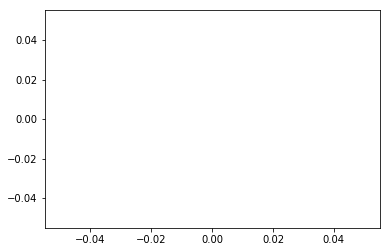

In [45]:
plt.scatter(tral["1994_trab_inf"], tral['1994_alfab'])

In [20]:
fora_tral = TI_fora_1994.join(AF_fora_1994, how='inner', lsuffix='_trab_inf', rsuffix='_alfab')
fora_tral.head()

,1994_trab_inf,1994_alfab
country,,
Gambia,NaN,NaN
Kyrgyz Republic,NaN,NaN
Serbia,NaN,NaN
South Africa,NaN,NaN
South Sudan,NaN,NaN


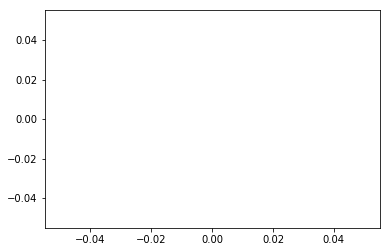

In [44]:
plt.scatter(fora_tral["1994_trab_inf"], fora_tral['1994_alfab'])

In [22]:
TI_membros_OIT_2010=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Portugal', 'Romania', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'Serbia', 'South Africa', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Timor-Leste', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']
TI_não_membros_2010=['Kyrgyz Republic', 'South Sudan', 'Syria']

In [23]:
trab_inf_idx.loc[TI_membros_OIT_2010, "ORG"] =1
TI_2010=trab_inf_idx

In [24]:
TI_org_2010= TI_2010.loc[(TI_2010.ORG==1), [2010]]
TI_org_2010.head(3)

,2010
country,
Afghanistan,NaN
Albania,5.5
Algeria,NaN


In [25]:
TI_fora_2010= TI_2010.loc[(TI_2010.ORG==0), [2010]]
TI_fora_2010.head(3)

,2010
country,
Kyrgyz Republic,NaN
South Sudan,NaN
Syria,NaN


In [26]:
AF_membros_OIT_2010=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kenya', 'Kuwait', 'Lao', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar',  'Maldives', 'Marshall Islands', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Mozambique', 'Montenegro', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Samoa', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'San Marino', 'Sao Tome and Principe', 'South Africa', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovenia', 'Solomon Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Timor-Leste', 'Trinidad and Tobago', 'Tuvalu', 'Vanuatu', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']
AF_não_membros_2010=['Bhutan', 'Cape Verde', 'Guyana', 'Kyrgyz Republic', 'Liechtenstein', 'Micronesia, Fed. Sts.', 'Nauru', 'North Korea',  'Palau', 'Palestine', 'South Korea', 'South Sudan', 'St. Lucia', 'St. Vincent and the Grenadines', 'Syria', 'Tonga']

In [28]:
alfab_idx.loc[AF_membros_OIT_2010, "ORG"] =1
AF_2010=alfab_idx

In [29]:
AF_org_2010= AF_2010.loc[(AF_2010.ORG==1), [2010]]
AF_org_2010.head(3)

,2010
country,
Afghanistan,NaN
Albania,13.70
Algeria,1.11


In [31]:
AF_fora_2010= AF_2010.loc[(AF_2010.ORG==0), [2010]]
AF_fora_2010.head(3)

,2010
country,
Bhutan,13.80
Cape Verde,12.50
Guyana,4.11


In [32]:
tral_2010 = TI_org_2010.join(AF_org_2010, how='inner', lsuffix='_trab_inf', rsuffix='_alfab')
tral_2010.head(7)

,2010_trab_inf,2010_alfab
country,,
Afghanistan,NaN,NaN
Albania,5.5,13.700
Algeria,NaN,1.110
Angola,NaN,24.700
Argentina,NaN,0.934
Armenia,9.9,NaN
Azerbaijan,NaN,15.300


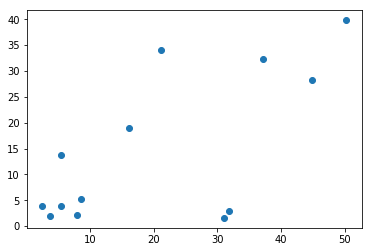

In [43]:
plt.scatter(tral_2010["2010_trab_inf"], tral_2010['2010_alfab'])

In [34]:
fora_tral_2010 = TI_fora_2010.join(AF_fora_2010, how='inner', lsuffix='_trab_inf', rsuffix='_alfab')
fora_tral_2010.head()

,2010_trab_inf,2010_alfab
country,,
Kyrgyz Republic,NaN,4.91
South Sudan,NaN,NaN
Syria,NaN,1.07


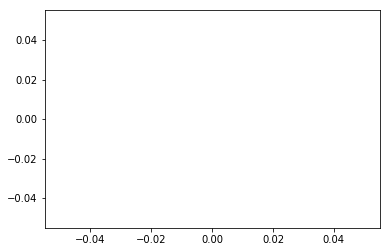

In [46]:
plt.scatter(fora_tral_2010["2010_trab_inf"], fora_tral_2010['2010_alfab'])